# 1. Local measures

## 1.1 Type of magnitude epistasis 

In [41]:
using Statistics 
using Plots
gr()
using LaTeXStrings
using DelimitedFiles

####################
#### functions #####
####################

#Decimal to Bit Conversion

function ToBit(d,n)
    z=n
    a=zeros(Int64,z)
    i=0
    q=d
    while q>0
        a[n-i]=q%2
        q=(q-(q%2))/2
        i+=1
    end
    return(a)
end

#Hamming distance calculator

function h(a,b)
    h=0
    
    for i in collect(1:1:L)
        if a[i]!=b[i]
            h+=1
        end
    end
    return(h)
end

L=2

function F(w,wopt,sigma) #Takes in phenotypic value and gives fitness
    F=zeros(Float64,2^L)
    for i in collect(1:1:2^L)
        F[i]=exp(-((w[i]-wopt)^2)/sigma^2)
    end
    Fmax=maximum(F)
    #return(F/Fmax)
    return(F)
end

function E(f) # Epistasis calculator
    fmax=maximum(f)
    seq=zeros(Int64,L)
    for k in collect(1:1:2^L)
        if f[k]==fmax
            seq=ToBit(k-1,L)
            
        end
    end
    ff=zeros(Float64,2^L)
     for k in collect(1:1:2^L)
            if h(seq,ToBit(k-1,L))==2 
                ff[1]=f[k]
               
            elseif h(seq,ToBit(k-1,L))==1 && ff[2]==0
                    ff[2]=f[k]
                    
            elseif h(seq,ToBit(k-1,L))==1 && ff[2]!=0
                    ff[3]=f[k]
                    
            end
    end                
                       
    e=(f[1]+f[4]-f[3]-f[2])
    return(e)
end

function Em(f) #Multiplicative Epistasis calculator
    fmax=maximum(f)
    seq=zeros(Int64,L)
    for k in collect(1:1:2^L)
        if f[k]==fmax
            seq=ToBit(k-1,L)
            
        end
    end
    ff=zeros(Float64,2^L)
     for k in collect(1:1:2^L)
            if h(seq,ToBit(k-1,L))==2 
                ff[1]=f[k]
               
            elseif h(seq,ToBit(k-1,L))==1 && ff[2]==0
                    ff[2]=f[k]
                    
            elseif h(seq,ToBit(k-1,L))==1 && ff[2]!=0
                    ff[3]=f[k]
                    
            end
    end                
                       
    e=(f[1]*f[4]-f[3]*f[2])
    return(e)
end


Em (generic function with 1 method)

In [50]:
tot=10000 ### Total number of repetitions 

frac1=Array{Float64,0} ### Array to store computational results
frac2=Array{Float64,0} ### Array to store results from theoretical approximation
frac3=Array{Float64,0}

p=Array{Any,1}(undef,0)

for sigma in [0.001,0.003,0.006,0.009,0.027,0.01,0.1,1,10]   ### Specify values of sigma 
    frac1=Array{Float64,0}
    frac2=Array{Float64,0}
    frac3=Array{Float64,0}
    for wopt in collect(0:0.01:1)

        samesign=0; yes=0; no=0; changesign=0; zero=0
        result1=zeros(Float64, tot)
        result2=zeros(Float64, tot)

        for i in collect(1:1:tot)
            w=zeros(Float64, 2^L)
            for j in collect(1:1:2^L)
                w[j]=rand() ### Generating random 2 locus landscpes 
            end

            e1=E(w) ##### Computational test ##########
            e2=E(F(w,wopt,sigma))
            result1[i]=e1*e2
            if result1[i]>0 ###########
                samesign+=1
            else
                changesign+=1
            end
            
             if e2==0 ########### 
                zero+=1
            end
            
            e1=E(w) #####Theoretical test  ########
            e2=Em(w)
            result2[i]=2*e1*e2-(sum(w)-2*wopt)*e1*e1
            if result2[i]>0
                yes+=1
            else
                no+=1
            end
        end

        frac1=hcat(frac1,samesign/tot)
        frac2=hcat(frac2,yes/tot)
        frac3=hcat(frac3,zero/tot)
    end
    writedlm("frac1_sigma=$(sigma).txt",frac1)
    writedlm("frac1_zero_sigma=$(sigma).txt",frac3)
    
end

writedlm("frac1_th.txt",frac2)


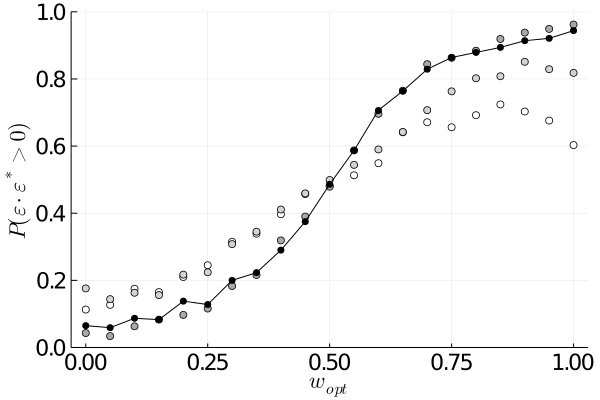

In [48]:
### Plotting Figure 2A ####

plot()
gr()

sigma=0.01
frac1=readdlm("frac1_sigma=$sigma.txt")

p=scatter!(collect(0:0.05:1),frac1[2:5:end],label="sigma=$sigma",markercolor=:white)#,markeralpha=0.5)#,palette=c)

sigma=0.1
frac1=readdlm("frac1_sigma=$sigma.txt")

p=scatter!(collect(0:0.05:1),frac1[2:5:end],label="sigma=$sigma",markercolor=:lightgrey)#,palette=c)

sigma=1.0
frac1=readdlm("frac1_sigma=$sigma.txt")

p=scatter!(collect(0:0.05:1),frac1[2:5:end],label="sigma=$sigma",markercolor=:darkgrey)#,palette=c)

sigma=10.0
frac1=readdlm("frac1_sigma=$sigma.txt")

p=scatter!(collect(0:0.05:1),frac1[2:5:end],label="sigma=$sigma",markercolor=:black)#,palette=c)
p=plot!(guidefontsize=15,tickfontsize=15,legend=:false,ylims=(0,1))

frac2=readdlm("frac1_th.txt")
p=plot!(collect(0:0.05:1),frac2[2:5:end],label="Theoretical Prediction", xlabel=L"$w_{opt}$", ylabel=L"$P(\epsilon \cdot \epsilon^* >0) $",linecolor=:black)

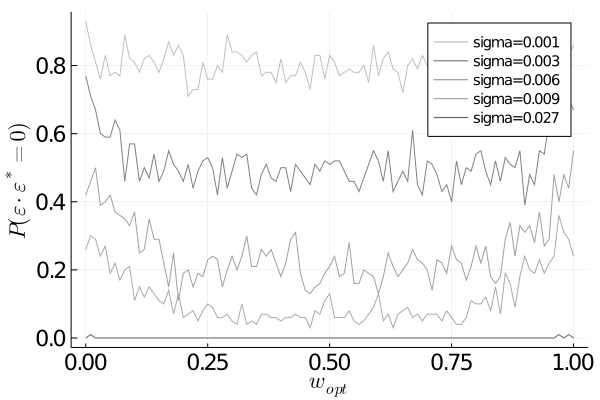

In [53]:
### Plotting Figure 2B ####

plot()
c=:gray1

sigma=0.001
frac1=readdlm("frac1_zero_sigma=$sigma.txt")
p=plot!(collect(0:0.01:1),frac1[2:end],label="sigma=$sigma", xlabel=L"$w_{opt}$", ylabel=L"$P(\epsilon \cdot \epsilon^* >0) $",linecolor=:grey,linealpha=0.5)

sigma=0.003
frac1=readdlm("frac1_zero_sigma=$sigma.txt")
p=plot!(collect(0:0.01:1),frac1[2:end],label="sigma=$sigma", xlabel=L"$w_{opt}$", ylabel=L"$P(\epsilon \cdot \epsilon^* >0) $",linecolor=:grey,linealpha=075)


sigma=0.006
frac1=readdlm("frac1_zero_sigma=$sigma.txt")
p=plot!(collect(0:0.01:1),frac1[2:end],label="sigma=$sigma", xlabel=L"$w_{opt}$", ylabel=L"$P(\epsilon \cdot \epsilon^* >0) $",linecolor=:grey,linealpha=0.75)


sigma=0.009
frac1=readdlm("frac1_zero_sigma=$sigma.txt")
p=plot!(collect(0:0.01:1),frac1[2:end],label="sigma=$sigma", xlabel=L"$w_{opt}$", ylabel=L"$P(\epsilon \cdot \epsilon^* =0) $",linecolor=:darkgrey,linealpha=1)


sigma=0.027
frac1=readdlm("frac1_zero_sigma=$sigma.txt")
p=plot!(collect(0:0.01:1),frac1[2:end],label="sigma=$sigma", xlabel=L"$w_{opt}$", ylabel=L"$P(\epsilon \cdot \epsilon^* =0) $",linecolor=:black,linealpha=0.6)

p=plot!(guidefontsize=15,tickfontsize=15,legendfontsize=10)

## 1.2 Type of sign epistasis 

In [57]:
####################
#### functions #####
####################

function hoc(L) ### generating house-of-cards landscapes 
    w=zeros(Float64, 2^L)
    for i in collect(1:1:2^L)
        w[i]=rand()
    end
    
    return(w)   
end


function peaks(w) ### calculating the number of peaks
    
    npeaks=1;
    wmax=maximum(w)
    
    for i in collect(1:1:2^L)
        c=0
        if w[i]!=wmax
            for j in collect(1:1:2^L)
                if h(ToBit(i-1,L),ToBit(j-1,L))==1 && w[i]>w[j]
                    c+=1
                end
            end
            if c==L
                npeaks+=1
            end
        end
    end

    return(npeaks)
end



function SE(w) ## Sign epistasis motif identifier
 
    wmax=maximum(w)    
    gmax=zeros(Float64,2)
    for i in collect(1:1:2^2) 
        if w[i]==wmax
            gmax=ToBit(i-1,2)
        end
    end
    
    d11=0; d12=0 ; d2=0; 
    for i in collect(1:1:2^2) 
        if h(gmax,ToBit(i-1,2))==1 && d11==0
            d11=i
        elseif h(gmax,ToBit(i-1,2))==1 && d11!=0
            d12=i
        elseif h(gmax,ToBit(i-1,2))==2
            d2=i
        end
    end
    
    if peaks(w)==2
        return("reci")
        
    elseif w[Int(d2)]< w[Int(d12)] && w[Int(d2)]<w[Int(d11)]
            return("no sign")
    else
        return("simple sign")
    end
    
    
end
    

SE (generic function with 1 method)

In [58]:
tot=10000; ### total number of repetitions  
sigma=1 ### Results are independent of sigma

ns_r=Array{Any,0}; ss_r=Array{Any,0}; r_r=Array{Any,0}    ## change from reciprcal sign epistasis
ns_ns=Array{Any,0}; ss_ns=Array{Any,0}; r_ns=Array{Any,0} ## change from no sign epistasis
ns_ss=Array{Any,0}; ss_ss=Array{Any,0}; r_ss=Array{Any,0} ## change from simple sign epistasis

reci=0; noSign=0; simpleSign=0; 

for wopt in collect(0:0.01:1)
    
    reci=0; noSign=0; simpleSign=0; 
    
    noSign_reci=0; simpleSign_reci=0; reci_reci=0; 
    noSign_noSign=0; simpleSign_noSign=0; reci_noSign=0;
    noSign_simpleSign=0; simpleSign_simpleSign=0; reci_simpleSign=0;
    
    for i in collect(1:1:tot)
        w=hoc(L)    
        epis=SE(w)
        
        if epis=="reci"
            reci+=1
            if SE(F(w, wopt, sigma))=="no sign"
                noSign_reci+=1
            elseif SE(F(w, wopt, sigma))=="simple sign"
                simpleSign_reci+=1
            else
                reci_reci+=1
            end
            
        elseif epis=="no sign"
            noSign+=1
             if SE(F(w, wopt, sigma))=="no sign"
                noSign_noSign+=1
            elseif SE(F(w, wopt, sigma))=="simple sign"
                simpleSign_noSign+=1
            else
                reci_noSign+=1
            end
            
        else
            simpleSign+=1
            if SE(F(w, wopt, sigma))=="no sign"
                noSign_simpleSign+=1
            elseif SE(F(w, wopt, sigma))=="simple sign"
                simpleSign_simpleSign+=1
            else
                reci_simpleSign+=1
            end         
            
        end
    end
    
    ns_r=hcat(ns_r,noSign_reci/reci); ss_r=hcat(ss_r,simpleSign_reci/reci); r_r=hcat(r_r,reci_reci/reci)
    ns_ns=hcat(ns_ns,noSign_noSign/noSign); ss_ns=hcat(ss_ns,simpleSign_noSign/noSign); r_ns=hcat(r_ns,reci_noSign/noSign)
    ns_ss=hcat(ns_ss,noSign_simpleSign/simpleSign); ss_ss=hcat(ss_ss,simpleSign_simpleSign/simpleSign); r_ss=hcat(r_ss,reci_simpleSign/simpleSign)
    
end
        
        
        

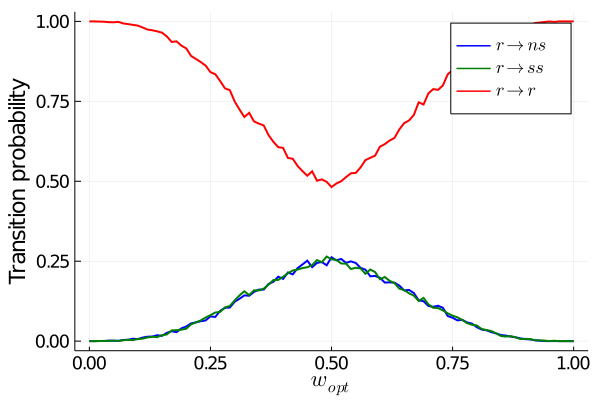

In [59]:
### Change from reciprocal sign epistasis

plot(collect(0:0.01:1),ns_r[2:102],label=L"r \to ns",linecolor=:blue,linewidth=:2)
plot!(collect(0:0.01:1),ss_r[2:102],label=L"r \to ss",linecolor=:green,linewidth=:2)
plot!(collect(0:0.01:1),r_r[2:102],label=L"r \to r",linecolor=:red,linewidth=:2)
plot!(xlabel=L"$w_{opt}$", ylabel="Transition probability", guidefontsize=15, guidefont=:Arial, tickfontsize=12, legendfontsize=12)

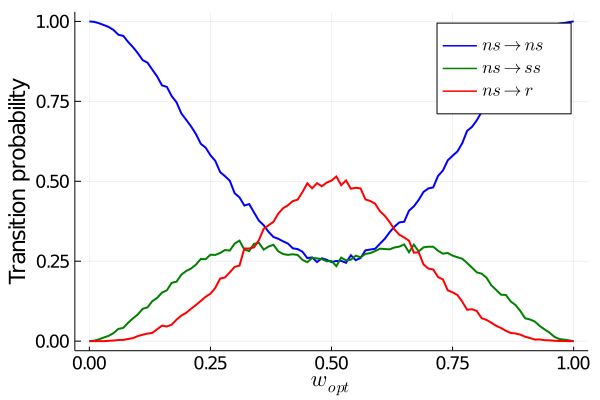

In [60]:
### Change from no sign epistasis

plot(collect(0:0.01:1),ns_ns[2:102],label=L"ns \to ns",linecolor=:blue,linewidth=:2)
plot!(collect(0:0.01:1),ss_ns[2:102],label=L"ns \to ss",linecolor=:green,linewidth=:2)
plot!(collect(0:0.01:1),r_ns[2:102],label=L"ns \to r",linecolor=:red,linewidth=:2) 
plot!(xlabel=L"$w_{opt}$", ylabel="Transition probability", guidefontsize=15, guidefont=:Arial, tickfontsize=12, legendfontsize=12)

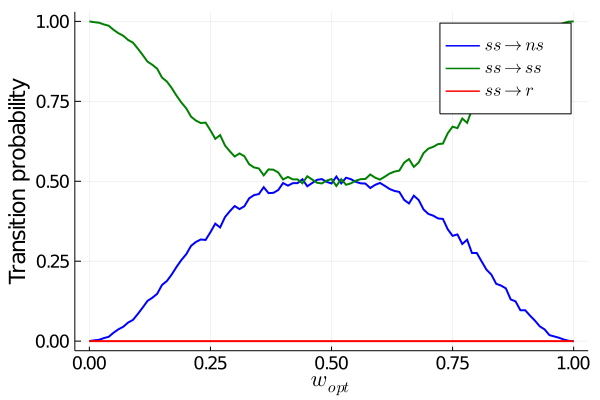

In [61]:
### Change from simple sign epistasis

plot(collect(0:0.01:1),ns_ss[2:102],label=L"ss \to ns",linecolor=:blue,linewidth=:2)
plot!(collect(0:0.01:1),ss_ss[2:102],label=L"ss \to ss",linecolor=:green,linewidth=:2)
plot!(collect(0:0.01:1),r_ss[2:102],label=L"ss \to r",linecolor=:red,linewidth=:2)
plot!(xlabel=L"$w_{opt}$", ylabel="Transition probability", guidefontsize=15, guidefont=:Arial, tickfontsize=12, legendfontsize=12)

# 1.3 Multi-locus landscapes 

In [87]:
####################
#### functions #####
####################

function h(a,b,L)
    h=0

    for i in collect(1:1:L)
        if a[i]!=b[i]
            h+=1
        end
    end
    return(h)
end


function ToDeci(a) ### Gives decimal value of a bit array "a"
    r=0
    L=length(a)
    for i in collect(1:1:length(a))
        r+=a[i]*2^(L-i)
    end
    return(r)
end

function peaks(w,L)
    
    npeaks=0;
    #wmax=maximum(w)
    
    for i in collect(1:1:2^L)
        c=0
        #if w[i]!=wmax
            for j in collect(1:1:2^L)
                if h(ToBit(i-1,L),ToBit(j-1,L),L)==1 && w[i]>w[j]
                    c+=1
                end
            end
            if c==L
                npeaks+=1
            end
        end
    #end

    return(npeaks)
end


function F(w,wopt,sigma,L) #Takes in phenotypic value and gives fitness for L>2
    F=zeros(Float64,2^L)
    for i in collect(1:1:2^L)
        F[i]=exp(-((w[i]-wopt)^2)/sigma^2)
    end
    Fmax=maximum(F)
    #return(F/Fmax)
    return(F)
end



function NK(L,k) #### NK landscape generator 
    w=zeros(Float64, 2^L)
    f=zeros(Float64, L,2^k)
    
    for j in collect(1:1:L)
        for l in collect(1:1:2^k)
            f[j,l]=rand() ### using adjacency model not block becasue that needs L to be divisible by k
        end
    end
    
    for i in collect(1:1:2^L)
        for j in collect(1:1:L)
            if j+k-1<=L
                w[i]+=f[j,ToDeci(ToBit(i-1,L)[j:j+k-1])+1]
            else
                w[i]+=f[j,ToDeci(vcat(ToBit(i-1,L)[j:L],ToBit(i-1,L)[1:k-1-(L-j)]))+1]
            end
        end
    end
    
    wmin=minimum(w)
            
           for n in collect(1:1:2^L) ######### Rescaling for w in 0 to 1
              w[n]=w[n]-wmin
             end
            
            wmax=maximum(w)
            
            for n in collect(1:1:2^L) ######### Rescaling for w in 0 to 1
                w[n]=w[n]/wmax
            end

    return(w)
end

NK (generic function with 1 method)

In [88]:
tot=10000 ### Total number of repetitions 
sigma=1 ### Results are independent of sigma
### Input value of K in line 25
 
Frac_2=Array{Float64,0}; Frac_3=Array{Float64,0};  ### Stores average absolute change in peaks for L=3,4..6
Frac_4=Array{Float64,0}; Frac_5=Array{Float64,0}; 
Frac_6=Array{Float64,0}
Frac_inc_2=Array{Float64,0};  Frac_dec_2=Array{Float64,0}; ### Stores increase and decrease in peaks for L=3,4..6
Frac_inc_3=Array{Float64,0};  Frac_dec_3=Array{Float64,0};
Frac_inc_4=Array{Float64,0};  Frac_dec_4=Array{Float64,0};
Frac_inc_5=Array{Float64,0};  Frac_dec_5=Array{Float64,0}
Frac_inc_6=Array{Float64,0};  Frac_dec_6=Array{Float64,0};

L=1 
## For L>6, same code was run on HPC
for k in collect(1:1:5)
   L+=1
 
    for wopt in collect(0:0.01:1)
        p1=zeros(Float64,tot); p2=zeros(Float64,tot); increase=0; decrease=0;
        dPeaks=zeros(Float64,tot)

        for i in collect(1:1:tot)

            w=NK(L,K) ### K=L for HOC and K=1 for Mt. Fuji
 
            p1[i]=peaks(w,L)
            p2[i]=peaks(F(w,wopt,sigma,L),L)


            dPeaks[i]=abs(p1[i]-p2[i])

            if p1[i]-p2[i]<0
                increase+=1
            elseif  p1[i]-p2[i]>0
                decrease+=1
            end

        end
        

    if L==2
            Frac_2=hcat(Frac_2, mean(dPeaks))
            Frac_inc_2=hcat(Frac_inc_2, increase/tot)
            Frac_dec_2=hcat(Frac_dec_2, decrease/tot)
    elseif L==3
            Frac_3=hcat(Frac_3, mean(dPeaks))
            Frac_inc_3=hcat(Frac_inc_3, increase/tot)
            Frac_dec_3=hcat(Frac_dec_3, decrease/tot)
     elseif L==4
            Frac_4=hcat(Frac_4, mean(dPeaks))
            Frac_inc_4=hcat(Frac_inc_4, increase/tot)
            Frac_dec_4=hcat(Frac_dec_4, decrease/tot)
    elseif L==5
            Frac_5=hcat(Frac_5, mean(dPeaks))
            Frac_inc_5=hcat(Frac_inc_5, increase/tot)
            Frac_dec_5=hcat(Frac_dec_5, decrease/tot)
          
    elseif L==6
            Frac_6=hcat(Frac_6, mean(dPeaks))
            Frac_inc_6=hcat(Frac_inc_6, increase/tot)
            Frac_dec_6=hcat(Frac_dec_6, decrease/tot)
            
    elseif L==7
            Frac_7=hcat(Frac_7, mean(dPeaks))
            Frac_inc_7=hcat(Frac_inc_7, increase/tot)
            Frac_dec_7=hcat(Frac_dec_7, decrease/tot)
    elseif L==8
            Frac_8=hcat(Frac_8, mean(dPeaks))
            Frac_inc_8=hcat(Frac_inc_8, increase/tot)
            Frac_dec_8=hcat(Frac_dec_8, decrease/tot)
    end
 

    end
end


LoadError: BoundsError: attempt to access 2-element Array{Int64,1} at index [1:3]

In [92]:
### Plotting the mean average change in peaks 

plot(collect(0:0.01:1),Frac_2[2:102],label="L=2",palette=:fruitpunch,linewidth=2)
plot!(collect(0:0.01:1),Frac_3[2:102],label="L=3",linewidth=2)
plot!(collect(0:0.01:1),Frac_4[2:102],label="L=4",linewidth=2)
plot!(collect(0:0.01:1),Frac_5[2:102],label="L=5",linewidth=2)#,xlabel="wopt",ylabel="Prob. of change")
plot!(collect(0:0.01:1),Frac_6[2:102],label="L=6",linewidth=2,legend=:false)#,xlabel="wopt",ylabel="Prob. of change")


plot!(xlabel=L"Optimal phenotype, $w_{opt}$", ylabel=L"Change in peaks  ", guidefontsize=12, guidefont=:Arial, tickfontsize=14, legendfontsize=12)


LoadError: MethodError: no method matching Array{Float64,0}(::UnitRange{Int64})
Closest candidates are:
  Array{Float64,0}(::AbstractArray{S,N}) where {T, N, S} at array.jl:562
  Array{Float64,0}(!Matched::UndefInitializer, !Matched::Int64...) where {T, N} at boot.jl:412
  Array{Float64,0}(!Matched::UndefInitializer, !Matched::Tuple{Vararg{Int64,N}}) where {T, N} at boot.jl:418
  ...

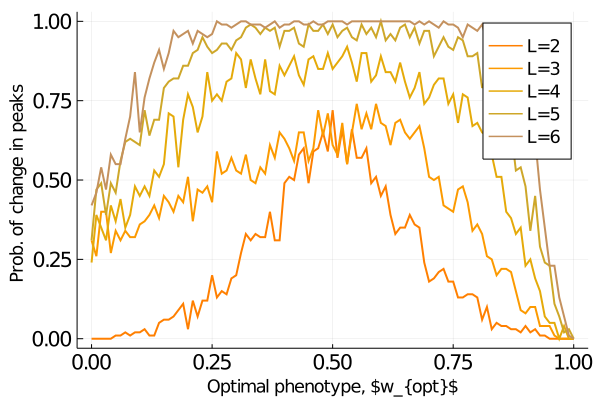

In [74]:
### Plotting the probability of change in peaks

plot()
plot(collect(0:0.01:1),Frac_inc_2[2:102]+Frac_dec_2[2:102],label="L=2",palette=:fruitpunch,linewidth=2)
plot!(collect(0:0.01:1),Frac_inc_3[2:102]+Frac_dec_3[2:102],label="L=3",linewidth=2,palette=:fruitpunch)
plot!(collect(0:0.01:1),Frac_inc_4[2:102]+Frac_dec_4[2:102],label="L=4",linewidth=2,palette=:fruitpunch)
plot!(collect(0:0.01:1),Frac_inc_5[2:102]+Frac_dec_5[2:102],label="L=5",linewidth=2)
plot!(collect(0:0.01:1),Frac_inc_6[2:102]+Frac_dec_6[2:102],label="L=6",linewidth=2)


plot!(xlabel=L"Optimal phenotype, $w_{opt}$", ylabel="Prob. of change in peaks ", guidefontsize=12, guidefont=:Arial, tickfontsize=14, legendfontsize=12)


In [89]:
#### NK spectrum for a specific L ########

tot=10000 ### Total number of repetitions 
sigma=1 ### Results are independent of sigma
L=5 ### input desired value of L and uncomment the corresponding array
 
Frac_2=Array{Float64,0}; Frac_3=Array{Float64,0};  ### Stores average absolute change in peaks for L=3,4..6
Frac_4=Array{Float64,0}; Frac_5=Array{Float64,0}; 
Frac_6=Array{Float64,0}
Frac_inc_2=Array{Float64,0};  Frac_dec_2=Array{Float64,0}; ### Stores increase and decrease in peaks for L=3,4..6
Frac_inc_3=Array{Float64,0};  Frac_dec_3=Array{Float64,0};
Frac_inc_4=Array{Float64,0};  Frac_dec_4=Array{Float64,0};
Frac_inc_5=Array{Float64,0};  Frac_dec_5=Array{Float64,0}
Frac_inc_6=Array{Float64,0};  Frac_dec_6=Array{Float64,0};

for K in collect(1:1:L)
    
    for wopt in collect(0:0.01:1)
        p1=zeros(Float64,tot); p2=zeros(Float64,tot); increase=0; decrease=0;
        
        dPeaks=zeros(Float64,tot)

        for i in collect(1:1:tot)

            w=zeros(Float64,2^L)
            w=NK(L,K)
                
    
            p1[i]=peaks(w,L) 
            
            p2[i]=peaks(F(w,wopt,sigma,L),L)
            

            dPeaks[i]=abs(p1[i]-p2[i])

            if p1[i]-p2[i]<0
                increase+=1
            elseif  p1[i]-p2[i]>0
                decrease+=1
            end

        end
        



    if L==2
            Frac_2=hcat(Frac_2, mean(dPeaks))
            Frac_inc_2=hcat(Frac_inc_2, increase/tot)
            Frac_dec_2=hcat(Frac_dec_2, decrease/tot)
    elseif L==3
            Frac_3=hcat(Frac_3, mean(dPeaks))
            Frac_inc_3=hcat(Frac_inc_3, increase/tot)
            Frac_dec_3=hcat(Frac_dec_3, decrease/tot)
     elseif L==4
            Frac_4=hcat(Frac_4, mean(dPeaks))
            Frac_inc_4=hcat(Frac_inc_4, increase/tot)
            Frac_dec_4=hcat(Frac_dec_4, decrease/tot)
    elseif L==5
            Frac_5=hcat(Frac_5, mean(dPeaks))
            Frac_inc_5=hcat(Frac_inc_5, increase/tot)
            Frac_dec_5=hcat(Frac_dec_5, decrease/tot)
          
    elseif L==6
            Frac_6=hcat(Frac_6, mean(dPeaks))
            Frac_inc_6=hcat(Frac_inc_6, increase/tot)
            Frac_dec_6=hcat(Frac_dec_6, decrease/tot)
            
    elseif L==7
            Frac_7=hcat(Frac_7, mean(dPeaks))
            Frac_inc_7=hcat(Frac_inc_7, increase/tot)
            Frac_dec_7=hcat(Frac_dec_7, decrease/tot)
    elseif L==8
            Frac_8=hcat(Frac_8, mean(dPeaks))
            Frac_inc_8=hcat(Frac_inc_8, increase/tot)
            Frac_dec_8=hcat(Frac_dec_8, decrease/tot)
    end
 

 

    end
   
end


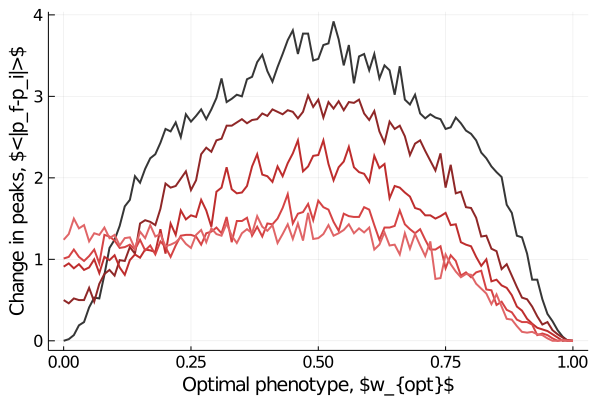

In [95]:

K=1
p=plot(collect(0:0.01:1),Frac_5[2:102],label="K=$(K-1)",linewidth=2,palette=:cherry)
   
K=2
p=plot!(collect(0:0.01:1),Frac_5[103:203],label="K=$(K-1)",linewidth=2,palette=:cherry)
  

K=3
p=plot!(collect(0:0.01:1),Frac_5[204:304],label="K=$(K-1)",linewidth=2,palette=:cherry,legend=:false)
 

K=4
p=plot!(collect(0:0.01:1),Frac_5[305:405],label="K=$(K-1)",linewidth=2,palette=:cherry)


K=5
p=plot!(collect(0:0.01:1),Frac_5[406:506],label="K=$(K-1)",linewidth=2,palette=:cherry,legend=:false)
 
plot!(xlabel=L"Optimal phenotype, $w_{opt}$", ylabel=L"Change in peaks, $<|p_f-p_i|>$", guidefontsize=13, guidefont=:Arial, tickfontsize=11, legendfontsize=12)

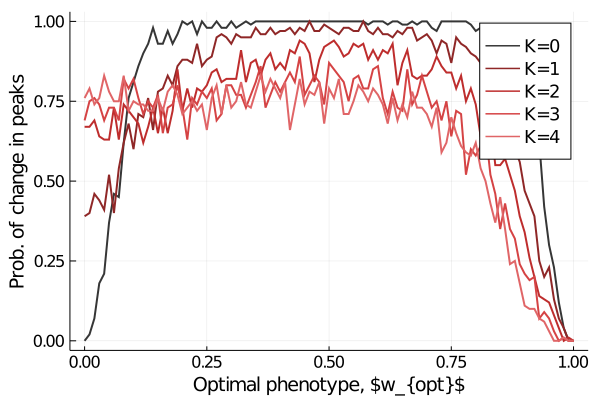

In [96]:
K=1
    p=plot(collect(0:0.01:1),Frac_inc_5[2:102]+Frac_dec_5[2:102],label="K=$(K-1)",linewidth=2,palette=:cherry)
    #p=plot!(collect(0:0.01:1),Frac_dec_5[2:102],label="L=$L, K=$K, dec", linestyle=:dot,linecolor=:blue)
K=2
p=plot!(collect(0:0.01:1),Frac_inc_5[103:203]+Frac_dec_5[103:203],label="K=$(K-1)",linewidth=2,palette=:cherry)
    #p=plot!(collect(0:0.01:1),Frac_dec_5[2:102],label="L=$L, K=$K, dec", linestyle=:dot,linecolor=:blue)


K=3
p=plot!(collect(0:0.01:1),Frac_inc_5[204:304]+Frac_dec_5[204:304],label="K=$(K-1)",linewidth=2,palette=:cherry)
    #p=plot!(collect(0:0.01:1),Frac_dec_5[2:102],label="L=$L, K=$K, dec", linestyle=:dot,linecolor=:blue)

K=4
p=plot!(collect(0:0.01:1),Frac_inc_5[305:405]+Frac_dec_5[305:405],label="K=$(K-1)",linewidth=2,palette=:cherry)
    #p=plot!(collect(0:0.01:1),Frac_dec_5[2:102],label="L=$L, K=$K, dec", linestyle=:dot,linecolor=:blue)

K=5
p=plot!(collect(0:0.01:1),Frac_inc_5[406:506]+Frac_dec_5[406:506],label="K=$(K-1)",linewidth=2,palette=:cherry)
    #p=plot!(collect(0:0.01:1),Frac_dec_5[2:102],label="L=$L, K=$K, dec", linestyle=:dot,linecolor=:blue)


plot!(xlabel=L"Optimal phenotype, $w_{opt}$", ylabel="Prob. of change in peaks", guidefontsize=13, guidefont=:Arial, tickfontsize=11, legendfontsize=12)